In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = "dataset/diabetes.csv"

In [3]:
data = pd.read_csv(file)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
%matplotlib inline

In [7]:
result = data["Outcome"]
result

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

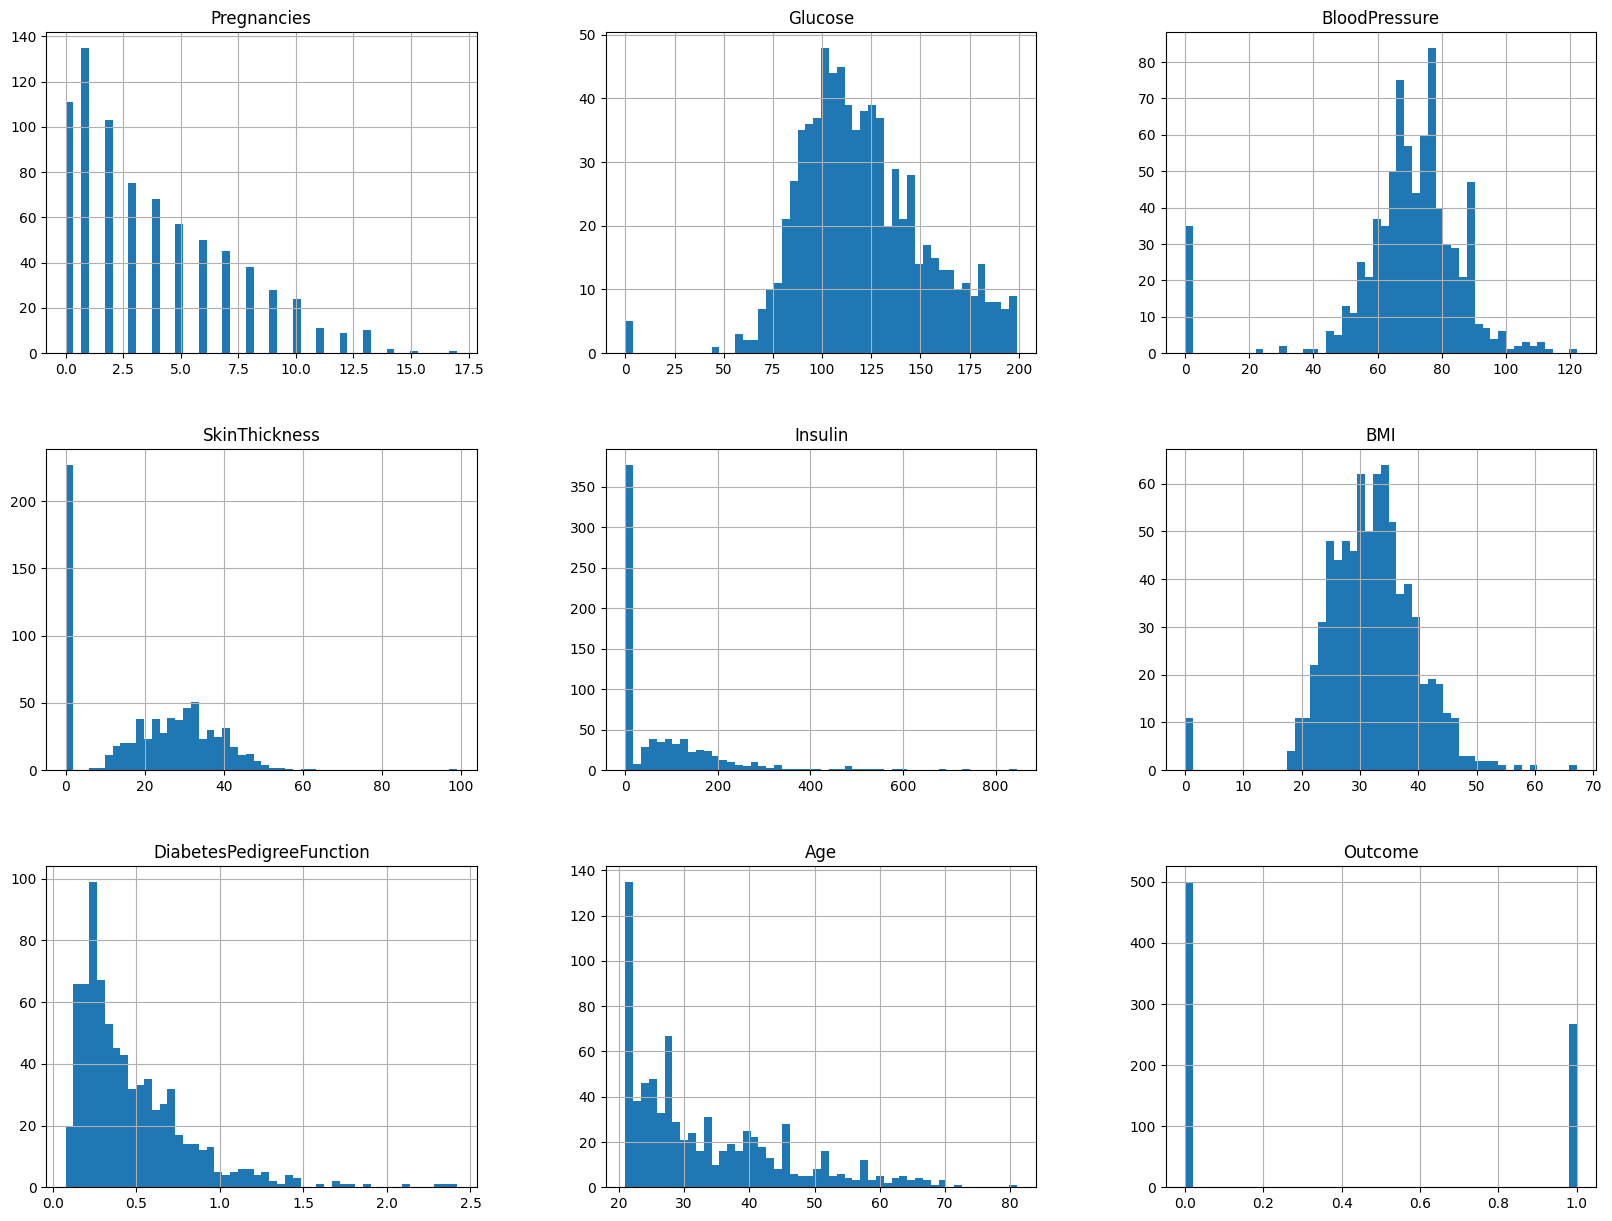

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [10]:
## Создание тестового набора данных

In [11]:
#упрощенный вариант train_test_split
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [12]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [13]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [14]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

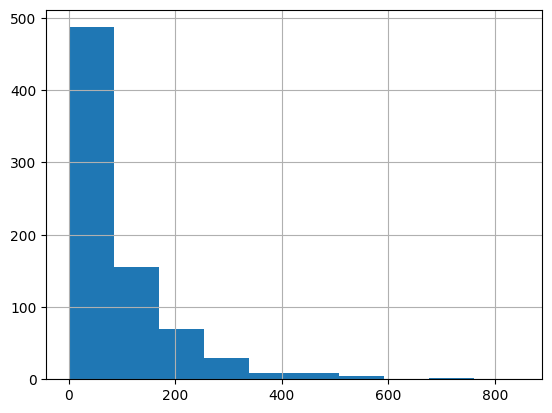

In [15]:
data.Insulin.hist();

In [16]:
data['Insulin_category'] = pd.cut(data['Insulin'],bins=[-1,50,100,150,200, np.inf],labels=[0,50,100,150,200])

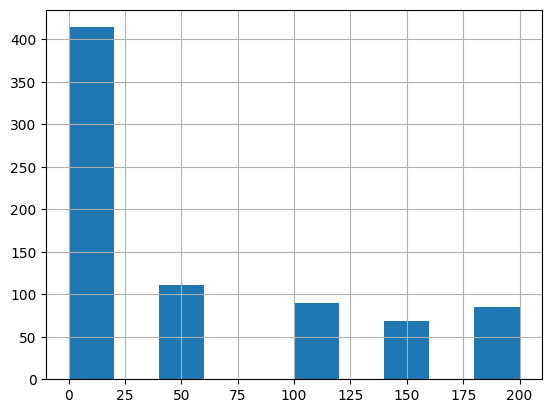

In [17]:
data.Insulin_category.hist();

In [18]:
#Стратификационная выборка

In [19]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [20]:
data['Insulin_category']

0        0
1        0
2        0
3       50
4      150
      ... 
763    150
764      0
765    100
766      0
767      0
Name: Insulin_category, Length: 768, dtype: category
Categories (5, int64): [0 < 50 < 100 < 150 < 200]

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['Outcome']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[353 711 373  46 682 360 414 339 694  33 218 705  76 616 675 613 666  34
 182 405 464 576 664   9 466 267 167 320 610 485 295 204 195 269 434 217
 323  85  26 171 716  96 561 296  60 175 737 601 294 209 730 764 751 216
 386 467 696 652 224 676 416 669 148 404 206 709  61 132  43 228  40 604
 695 752 375 214  69  14 306 312 334 442 658 105 551 299 286 106 744 282
 619 363 316 141 463 657 718 691 544 321 358 117 651 336 118 603 473  51
 729 623 671 234 465 100 134 569 103 459 340 504  21 625 454 152 594 614
  68  74  47  22  95 536 583  18 600 757 648 281 598 397 184 627 126 636
  56 472 512 758 289 249  28  59 539  58  31 367  37 201 706 597 272 617
 555 120 692  57 497 147 521 369 357 352 524 229 707 338 266 547 343 565
 681 588 470 653 487 519 680 655 632  50 552 197   2 230 633 571  98 631
 455 128 248 548 586 203 738 372 443 194 333 762 582 500  97 226 200 331
 301 581 592 748  10 690 540 398 285 391 259 684 287 714 176 160 761 644
 605 315 297 444 284 241 413 318  55 210  66 423 43

In [22]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Insulin_category",axis=1,inplace=True)

In [23]:
data = strat_train_set.copy()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62,12,43,27.2,0.580,24,0
711,5,126,78,27,22,29.6,0.439,40,0
373,2,105,58,40,94,34.9,0.225,25,0
46,1,146,56,0,0,29.7,0.564,29,0
682,0,95,64,39,105,44.6,0.366,22,0
...,...,...,...,...,...,...,...,...,...
451,2,134,70,0,0,28.9,0.542,23,1
113,4,76,62,0,0,34.0,0.391,25,0
556,1,97,70,40,0,38.1,0.218,30,0
667,10,111,70,27,0,27.5,0.141,40,1


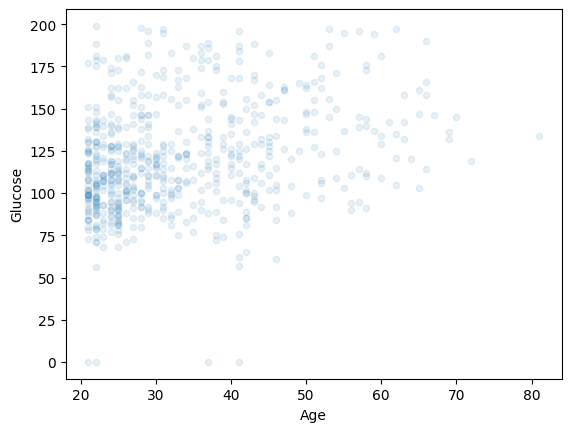

In [24]:
data.plot(kind='scatter',x='Age',y = 'Glucose',alpha = 0.1);

In [25]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135325,0.099961,-0.120625,-0.059555,0.004323,-0.051994,0.535957,0.208173
Glucose,0.135325,1.000000,0.147528,0.051196,0.350183,0.198945,0.135063,0.281686,0.479330
BloodPressure,0.099961,0.147528,1.000000,0.156092,0.087449,0.270354,0.023325,0.216377,0.082383
SkinThickness,-0.120625,0.051196,0.156092,1.000000,0.472237,0.374187,0.195006,-0.115125,0.093789
Insulin,-0.059555,0.350183,0.087449,0.472237,1.000000,0.203763,0.238760,-0.031427,0.164197
BMI,0.004323,0.198945,0.270354,0.374187,0.203763,1.000000,0.138044,0.029924,0.301422
DiabetesPedigreeFunction,-0.051994,0.135063,0.023325,0.195006,0.238760,0.138044,1.000000,0.025108,0.165312
Age,0.535957,0.281686,0.216377,-0.115125,-0.031427,0.029924,0.025108,1.000000,0.240676
Outcome,0.208173,0.479330,0.082383,0.093789,0.164197,0.301422,0.165312,0.240676,1.000000


In [26]:
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.479330
Insulin                     0.350183
Age                         0.281686
BMI                         0.198945
BloodPressure               0.147528
Pregnancies                 0.135325
DiabetesPedigreeFunction    0.135063
SkinThickness               0.051196
Name: Glucose, dtype: float64

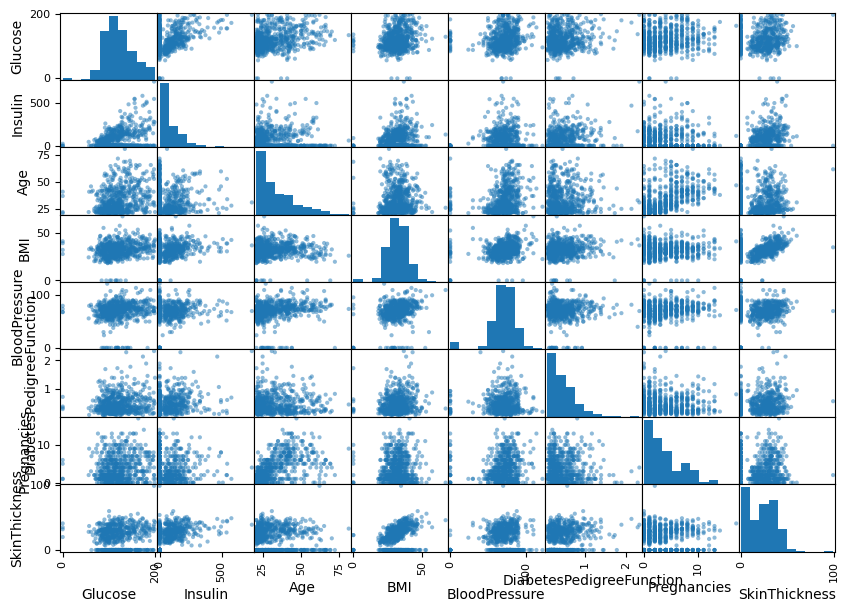

In [27]:
from pandas.plotting import scatter_matrix

attributes = ['Glucose','Insulin','Age','BMI','BloodPressure','DiabetesPedigreeFunction','Pregnancies','SkinThickness']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

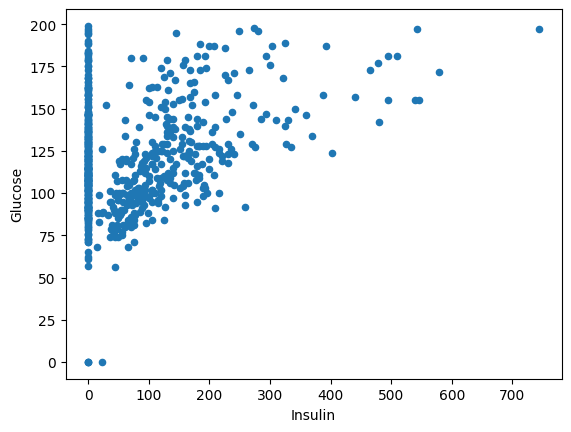

In [28]:
data.plot(kind='scatter',x='Insulin',y='Glucose',alpha=1)

In [29]:
#комбинирование признаков

In [30]:
# не уверен что есть в этом смысл при работе с данным набором данных

In [31]:
data = strat_train_set.drop('Outcome',axis=1)
res = strat_train_set['Outcome'].copy()

In [32]:
#работа с пропусками с использованием SimpleImputer

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # только для числовых признаков

In [34]:
data_num = data
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
X = imputer.transform(data_num)

In [36]:
data_tranformed = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_tranformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0
46,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0
682,0.0,95.0,64.0,39.0,105.0,44.6,0.366,22.0
...,...,...,...,...,...,...,...,...
451,2.0,134.0,70.0,0.0,0.0,28.9,0.542,23.0
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
556,1.0,97.0,70.0,40.0,0.0,38.1,0.218,30.0
667,10.0,111.0,70.0,27.0,0.0,27.5,0.141,40.0


In [37]:
# я так понял, что в данной работе собсвенный трансформер не нужен

In [38]:
#Масштабирование признаков

In [39]:
#Конвееризация

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [42]:
data_num_transformed

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

In [43]:
#категориальных признаков нет, поэтому pipeline для них не нужен

In [44]:
#Обучение модели

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_num_transformed,res)

LinearRegression()

In [83]:
import pickle

with open("modelLinear.pkl", "wb") as f:
    pickle.dump(tree_regressor, f)

In [46]:
some_data = data.iloc[:5]
data_labels = res.iloc[:5]
data_prepared_some = pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [0.04231475 0.38278166 0.23257334 0.4440524  0.26121656]
Метки: [0, 0, 0, 0, 0]


In [47]:
from sklearn.metrics import mean_squared_error

data_prepared = pipeline.transform(data)
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(res, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.3955168540007081


In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,res)

DecisionTreeRegressor()

In [81]:
import pickle

with open("modelDTR.pkl", "wb") as f:
    pickle.dump(tree_regressor, f)

In [49]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(res, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


In [50]:
#Кросс валидация

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor,data_prepared,res,scoring='neg_mean_squared_error') # функция считает utility функцию или функцию качества, которая является противоположностью функции потерь

scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [0.58434871 0.56309251 0.59809997 0.57026595 0.54321448]
Среднее: 0.5718043227078607
Стандартное отклонение: 0.018678675061603818


In [53]:
lin_scores = cross_val_score(model,data_prepared,res,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Оценки: [0.41240191 0.42202701 0.4028796  0.36907477 0.4418284  0.42522481
 0.39065957 0.40376891 0.3680508  0.37581556]
Среднее: 0.40117313372088914
Стандартное отклонение: 0.023838811666857557


In [54]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134,70,0,0,28.9,0.542,23
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
667,10,111,70,27,0,27.5,0.141,40


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,res)
forest_rmse = mean_squared_error(res, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(model, data_prepared,res,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

0.1528315800372342
Оценки: [0.42060219 0.38105233 0.43583025 0.40029677 0.3744464 ]
Среднее: 0.4024455856300844
Стандартное отклонение: 0.023196730961576158


In [56]:
### GridSearch - Fine-tunning

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,res)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [59]:
cv_res = grid_search.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

0.44368298535861683 {'max_features': 2, 'n_estimators': 3}
0.4214750409960163 {'max_features': 2, 'n_estimators': 10}
0.40683885276410353 {'max_features': 2, 'n_estimators': 30}
0.4569571198805962 {'max_features': 4, 'n_estimators': 3}
0.42429359722250004 {'max_features': 4, 'n_estimators': 10}
0.40547053650805265 {'max_features': 4, 'n_estimators': 30}
0.4489800334931538 {'max_features': 7, 'n_estimators': 3}
0.42934818510665473 {'max_features': 7, 'n_estimators': 10}
0.41464094182464256 {'max_features': 7, 'n_estimators': 30}
0.47541011692377333 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.42652740796823446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.41699578276512517 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.46324628882843477 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.42062686855253795 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.4216489276709368 {'bootstrap': False, 'max_features': 3, 'n_estima

In [60]:
#Важность признаков

In [61]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('Outcome',axis=1)
y_test = strat_test_set['Outcome'].copy()
X_test_preprocessed = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_preprocessed)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.41124174048820616


In [62]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([0.36334917, 0.45411113])

In [63]:
#Реализация SVM

In [64]:
from sklearn import svm

In [78]:

model = svm.SVC()
model.fit(data_num_transformed,res)

SVC()

In [79]:
import pickle

with open("modelSVM.pkl", "wb") as f:
    pickle.dump(model, f)

In [66]:
some_data = data.iloc[:5]
data_labels = res.iloc[:5]
data_prepared_some = pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [0 0 0 1 0]
Метки: [0, 0, 0, 0, 0]


In [67]:
param_grid = [
    {
        'kernel':['linear'], 'C':[0.01,0.1,1,10,50]
    }, 
    {
          'kernel':['rbf'],'C':[0.01,0.1,1,10,50],'gamma':['scale',0.1,0.01,0.001,0.0001]
    }
]

regressor = svm.SVC()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,res)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 50], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 50],
                          'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [69]:
grid_search.best_params_

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
#оценка после подбора оптимальных параметров

In [71]:
score = grid_search.best_score_
print("RMSE Score: ", np.sqrt(-score))

RMSE Score:  0.46711103916610197


In [72]:
#KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_num_transformed,res)

KNeighborsClassifier(n_neighbors=3)

In [75]:
param_grid = [
    {
        'n_neighbors':[3,5,7,9]
    }
]

regressor = KNeighborsClassifier()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'n_neighbors': 9}

In [77]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)